<a href="https://colab.research.google.com/github/Shubham6518/Data-Science-Assignments/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependanicies


In [37]:
# Importing necessary libraries for data manipulation, splitting, visualization, and model training
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [38]:
# Loading the California House Price dataset from scikit-learn
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [39]:
# Printing the dataset description (optional, for understanding the data)
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Feature Importances:
MedInc        0.495321
AveOccup      0.140430
Longitude     0.109037
Latitude      0.095238
HouseAge      0.066769
AveRooms      0.045192
Population    0.024329
AveBedrms     0.023684
dtype: float32


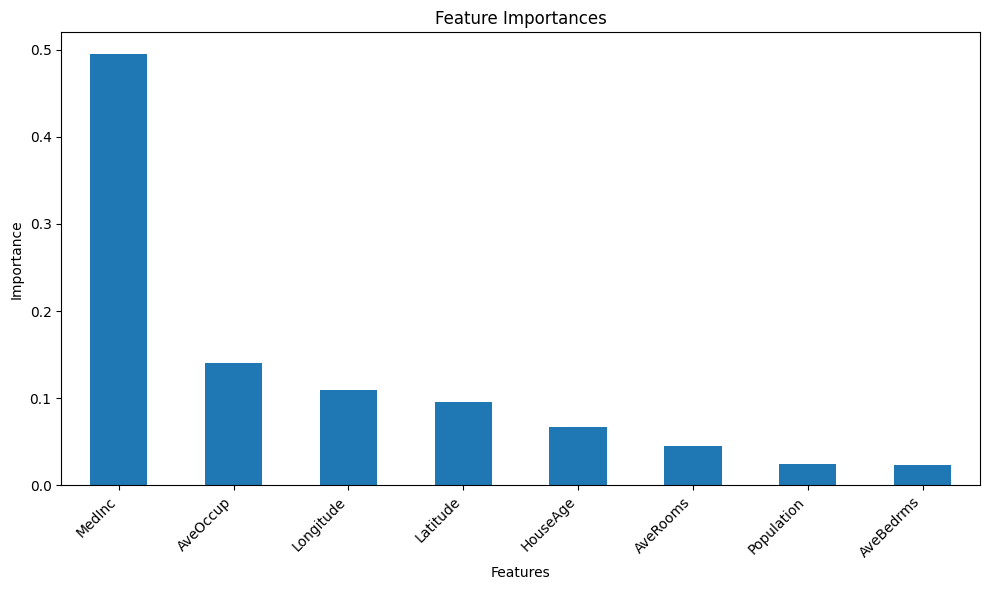

In [62]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a pandas Series for easier visualization
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(sorted_feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Creating a pandas DataFrame from the dataset's data and feature names
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [41]:
# Displaying the first 5 rows of the DataFrame to get a glimpse of the data
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
# Adding the target variable ('price') to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [43]:
# Displaying the first 5 rows of the DataFrame including the 'price' column
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
# Getting the number of rows and columns in the DataFrame
house_price_dataframe.shape

(20640, 9)

In [45]:
# Checking for missing values in each column
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [46]:
# Generating descriptive statistics for the DataFrame
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [47]:
# Calculating the correlation matrix between the features and the target
correlation = house_price_dataframe.corr()

<Axes: >

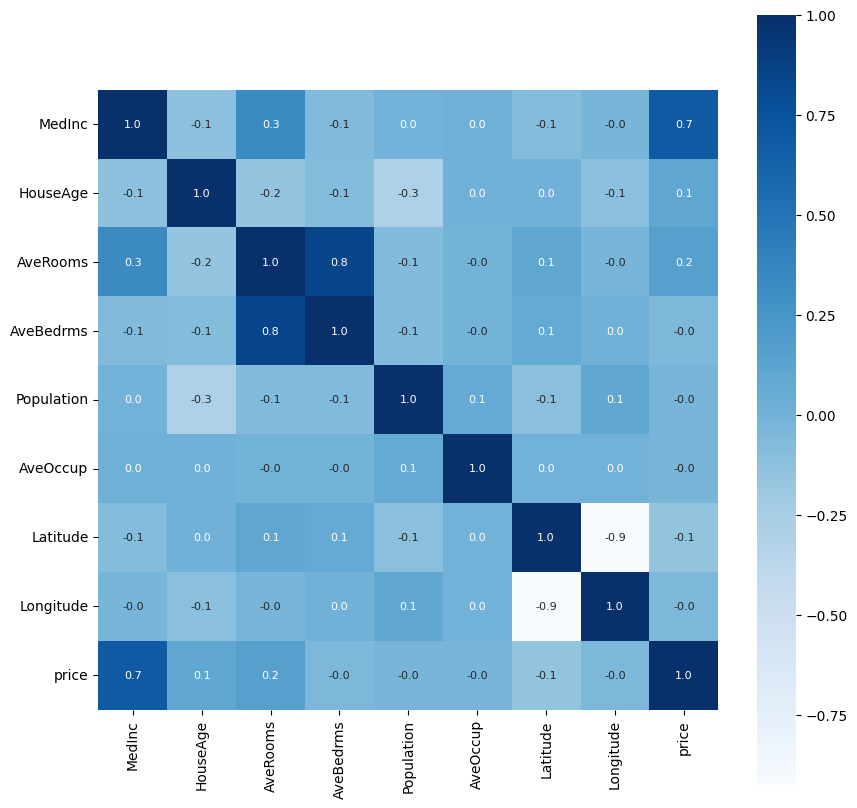

In [48]:
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [49]:
# Separating the features (X) and the target variable (Y)
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [50]:
# Printing the features (X) and the target variable (Y)
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into Training and Test data


In [51]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [52]:
# Printing the shapes of the original, training, and testing sets
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [53]:
# Initializing the XGBoost Regressor model
model = XGBRegressor()

In [54]:
# Training the XGBoost model with the training data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Prediction on training data

In [55]:
# Making predictions on the training data
training_data_prediction = model.predict(X_train)

In [56]:
# Printing the predictions on the training data
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [57]:
# Evaluating the model's performance on the training data using R-squared and Mean Absolute Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Printing the evaluation metrics for the training data
print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


Visualizing the actual Prices and predicted prices

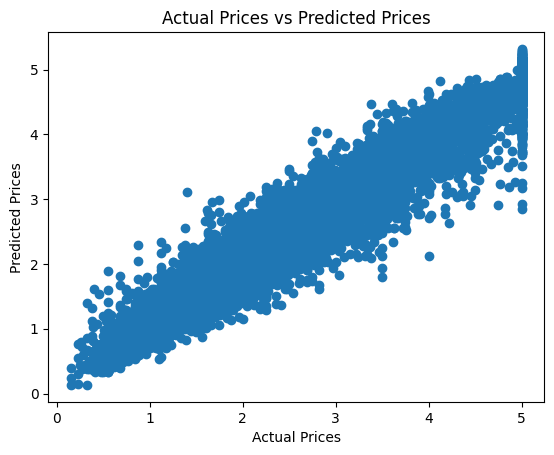

In [58]:
# Visualize the actual prices and predicted prices on the training data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

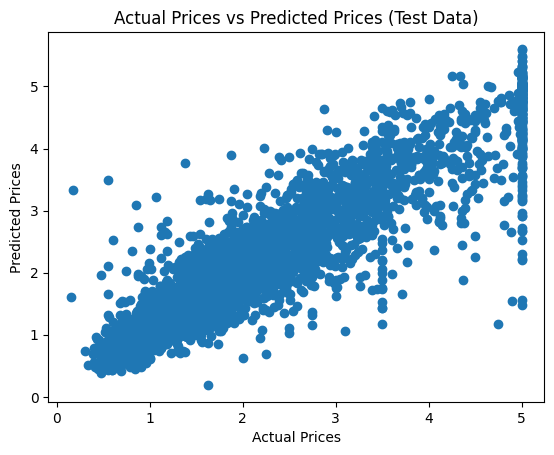

In [61]:
# Visualize the actual prices and predicted prices on the test data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Test Data)")
plt.show()

Prediction on Test Data

In [59]:
# Making predictions on the test data
test_data_prediction = model.predict(X_test)

In [60]:
# Evaluating the model's performance on the test data using R-squared and Mean Absolute Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Printing the evaluation metrics for the test data
print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186
